In [33]:
import sys
import os
import pathlib
import numpy as np
import json
import matplotlib.pyplot as plt
from kneed import KneeLocator
from scipy.ndimage import uniform_filter1d

In [34]:
mallet_path = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/umd/theta-evaluation/data/models/mallet")
ctm_path = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/umd/theta-evaluation/data/models/ctm")

In [35]:
def load_model_info(model_path):
    if model_path.stem == "mallet":
        thetas = np.load(model_path / "doctopics.npz.npy")
        betas = np.load(model_path / "beta.npy")
    elif model_path.stem == "ctm":
        thetas = np.load(model_path / "train.theta.npy")
        betas = np.load(model_path / "beta.npy")
    else:
        print("Model type not recognized")
        return
    
    with open(model_path / "vocab.json") as infile:
        vocab_w2id = json.load(infile)
    
    bow = np.load(model_path / "bow_mat.npy")
    
    with (model_path / "topics.txt").open('r', encoding='utf8') as fin:
        keys = [el.strip() for el in fin.readlines()]
    
    return thetas, betas, vocab_w2id, bow, keys

In [60]:
def thrFig(thetas32, thetas_thr=3e-3, poly_degree=3, smoothing_window=5):
    sampled_docs = {}
    all_elbows = []
    
    for k in range(len(thetas32.T)):
        allvalues = np.sort(thetas32[:, k].flatten())
        step = int(np.round(len(allvalues) / 1000))
        x_values = allvalues[::step]
        y_values = (100 / len(allvalues)) * np.arange(0, len(allvalues))[::step]

        # Apply smoothing
        y_values_smooth = uniform_filter1d(y_values, size=smoothing_window)
        
        plt.semilogx(x_values, y_values_smooth)
        
        # Using KneeLocator to find the elbow point
        kneedle = KneeLocator(x_values, y_values_smooth, curve='convex', direction='increasing', interp_method='polynomial', polynomial_degree=poly_degree)
        elbow = kneedle.elbow
        all_elbows.append(elbow)
        
        # Filter document indices based on the elbow point (keeping values above the elbow)
        if elbow:
            significant_docs[k] = np.where(thetas32[:, k] >= elbow)[0]
    
    
    # Plot elbows
    #for elbow in all_elbows:
    #    if elbow:
    #        plt.semilogx([elbow, elbow], [0, 100], 'g--', label=f'Elbow {elbow}')

    plt.show()
        
    return significant_docs, elbows

In [36]:
thetas_mallet, betas_mallet, vocab_w2id_mallet, bow_mallet, keys_mallet = load_model_info(mallet_path)
thetas_ctm, betas_ctm, vocab_w2id_ctm, bow_ctm, keys_ctm = load_model_info(ctm_path)

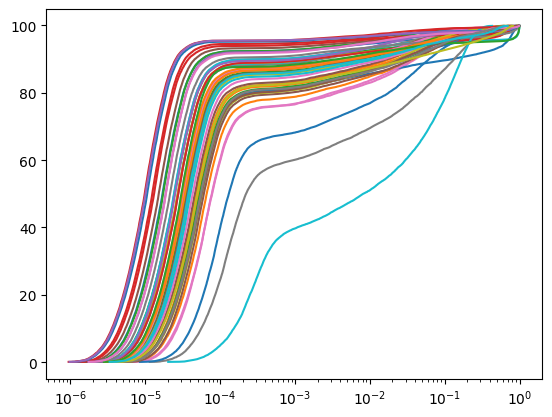

ELBOWS:  [0.7792659, 0.687971, 0.692486, 0.8120671, 0.75786465, 0.7611834, 0.5221809, 0.78930014, 0.6889924, 0.68035465, 0.72952235, 0.540052, 0.6712624, 0.740602, 0.7734349, 0.5962516, 0.6497761, 0.40709585, 0.6759843, 0.8499076, 0.6972453, 0.5429293, 0.74061453, 0.7072606, 0.65133816, 0.76090205, 0.5601941, 0.7940227, 0.56310815, 0.58321196, 0.6476571, 0.5398924, 0.45741257, 0.7758262, 0.77528656, 0.51687634, 0.6789173, 0.5400802, 0.49007687, 0.27168533, 0.80979663, 0.6835376, 0.82513237, 0.6695635, 0.79128534, 0.72940254, 0.7290348, 0.5003278, 0.59641635, 0.5038837]
Significant documents for topic 0: 206
Significant documents for topic 1: 66
Significant documents for topic 2: 66
Significant documents for topic 3: 66
Significant documents for topic 4: 108
Significant documents for topic 5: 136
Significant documents for topic 6: 80
Significant documents for topic 7: 80
Significant documents for topic 8: 108
Significant documents for topic 9: 108
Significant documents for topic 10: 570

In [61]:
significant_docs, elbows = thrFig(thetas_mallet)

print("ELBOWS: ", elbows)

for topic, docs in significant_docs.items():
    print(f"Significant documents for topic {topic}: {len(docs)}")

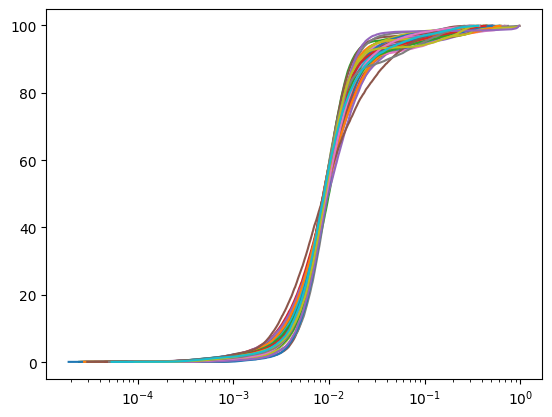

ELBOWS:  [0.7792659, 0.687971, 0.692486, 0.8120671, 0.75786465, 0.7611834, 0.5221809, 0.78930014, 0.6889924, 0.68035465, 0.72952235, 0.540052, 0.6712624, 0.740602, 0.7734349, 0.5962516, 0.6497761, 0.40709585, 0.6759843, 0.8499076, 0.6972453, 0.5429293, 0.74061453, 0.7072606, 0.65133816, 0.76090205, 0.5601941, 0.7940227, 0.56310815, 0.58321196, 0.6476571, 0.5398924, 0.45741257, 0.7758262, 0.77528656, 0.51687634, 0.6789173, 0.5400802, 0.49007687, 0.27168533, 0.80979663, 0.6835376, 0.82513237, 0.6695635, 0.79128534, 0.72940254, 0.7290348, 0.5003278, 0.59641635, 0.5038837]
Significant documents for topic 0: 248
Significant documents for topic 1: 122
Significant documents for topic 2: 150
Significant documents for topic 3: 108
Significant documents for topic 4: 234
Significant documents for topic 5: 38
Significant documents for topic 6: 52
Significant documents for topic 7: 94
Significant documents for topic 8: 66
Significant documents for topic 9: 24
Significant documents for topic 10: 122

In [62]:
significant_docs, elbows = thrFig(thetas_ctm)

print("ELBOWS: ", elbows)

for topic, docs in significant_docs.items():
    print(f"Significant documents for topic {topic}: {len(docs)}")